<a href="https://colab.research.google.com/github/ssenichhh/Neural-Networks/blob/main/CIFAR-10/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR-10 Image Classification using Convolutional Neural Networks (CNN)

This project demonstrates the development and evaluation of convolutional neural networks (CNNs) on the CIFAR-10 dataset. CIFAR-10 is a widely-used dataset for image classification tasks in computer vision and machine learning. It consists of 60,000 color images in 10 classes, with 6,000 images per class. The dataset includes everyday objects such as animals, vehicles, and other items.

## Characteristics of the CIFAR-10 dataset:

- Number of classes: 10
- Classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck
- Dataset size: 60,000 images
- Training set size: 50,000 images
- Test set size: 10,000 images
- Image size: 32x32 pixels
- Number of color channels: 3 (RGB)

CIFAR-10 is extensively used for evaluating and comparing machine learning algorithms, especially for image classification tasks. It provides sufficient complexity to test algorithms while being small enough for quick training of models, making it a popular choice for experiments and educational purposes.

# 1. Develop a Convolutional Neural Network for the CIFAR-10 Image Dataset


Epoch 1/10
196/196 [==============================] - 61s 305ms/step - loss: 1.8007 - accuracy: 0.3418 - val_loss: 1.4782 - val_accuracy: 0.4696
Epoch 2/10
196/196 [==============================] - 59s 299ms/step - loss: 1.4747 - accuracy: 0.4670 - val_loss: 1.2892 - val_accuracy: 0.5413
Epoch 3/10
196/196 [==============================] - 60s 305ms/step - loss: 1.3686 - accuracy: 0.5102 - val_loss: 1.1978 - val_accuracy: 0.5733
Epoch 4/10
196/196 [==============================] - 61s 309ms/step - loss: 1.2883 - accuracy: 0.5438 - val_loss: 1.1307 - val_accuracy: 0.6023
Epoch 5/10
196/196 [==============================] - 59s 300ms/step - loss: 1.2284 - accuracy: 0.5649 - val_loss: 1.0966 - val_accuracy: 0.6132
Epoch 6/10
196/196 [==============================] - 58s 296ms/step - loss: 1.1939 - accuracy: 0.5808 - val_loss: 1.0434 - val_accuracy: 0.6348
Epoch 7/10
196/196 [==============================] - 59s 302ms/step - loss: 1.1513 - accuracy: 0.5940 - val_loss: 1.0202 - val_ac

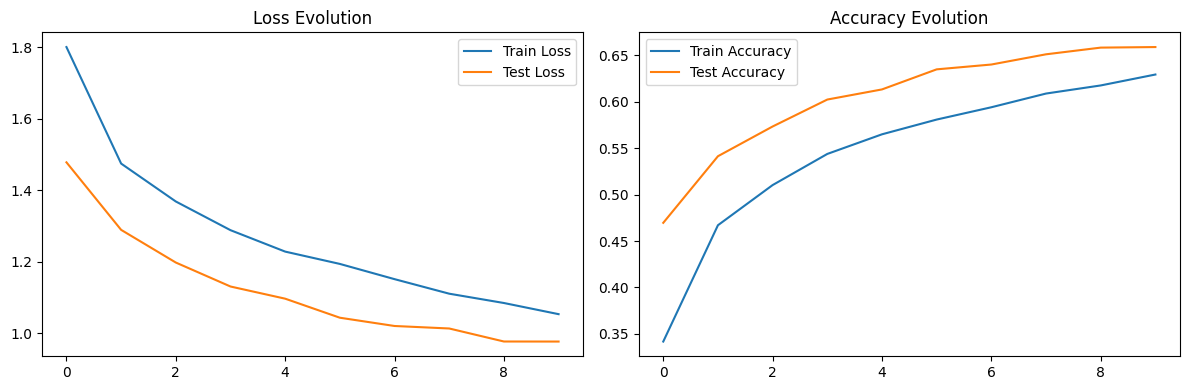

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the image data to [0, 1] range
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert class labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model architecture
model = Sequential()

# Add convolutional layer with 32 filters, kernel size 3x3, and ReLU activation
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
# Add max pooling layer with pool size 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add convolutional layer with 64 filters, kernel size 3x3, and ReLU activation
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# Add max pooling layer with pool size 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))
# Flatten the output of the previous layer
model.add(Flatten())
# Add dense (fully connected) layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))
# Add dropout layer to prevent overfitting
model.add(Dropout(0.5))
# Add dense layer with 10 units (number of classes) and softmax activation
model.add(Dense(10, activation='softmax'))

# Compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model for 10 epochs with batch size of 256, using validation data
history = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Model accuracy: {accuracy*100:.2f}%")

# Plot the loss and accuracy evolution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Loss Evolution')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Accuracy Evolution')
plt.tight_layout()
plt.show()

# 2. Investigate the Impact of Different Optimizers (Adam, SGD, RMSprop), Activation Functions (ReLU, ELU, Sigmoid, Tanh), and Regularization Techniques (L1, L2, Dropout, Batch Normalization)

Epoch 1/10
196/196 [==============================] - 66s 332ms/step - loss: 4.9997 - accuracy: 0.2186 - val_loss: 4.7878 - val_accuracy: 0.2863
Epoch 2/10
196/196 [==============================] - 72s 363ms/step - loss: 4.5915 - accuracy: 0.3102 - val_loss: 4.4311 - val_accuracy: 0.3326
Epoch 3/10
196/196 [==============================] - 65s 331ms/step - loss: 4.3041 - accuracy: 0.3424 - val_loss: 4.1806 - val_accuracy: 0.3573
Epoch 4/10
196/196 [==============================] - 65s 330ms/step - loss: 4.0594 - accuracy: 0.3710 - val_loss: 3.9436 - val_accuracy: 0.3845
Epoch 5/10
196/196 [==============================] - 64s 326ms/step - loss: 3.8470 - accuracy: 0.3907 - val_loss: 3.7471 - val_accuracy: 0.3935
Epoch 6/10
196/196 [==============================] - 64s 326ms/step - loss: 3.6511 - accuracy: 0.4064 - val_loss: 3.6395 - val_accuracy: 0.3796
Epoch 7/10
196/196 [==============================] - 65s 332ms/step - loss: 3.4830 - accuracy: 0.4183 - val_loss: 3.3965 - val_ac

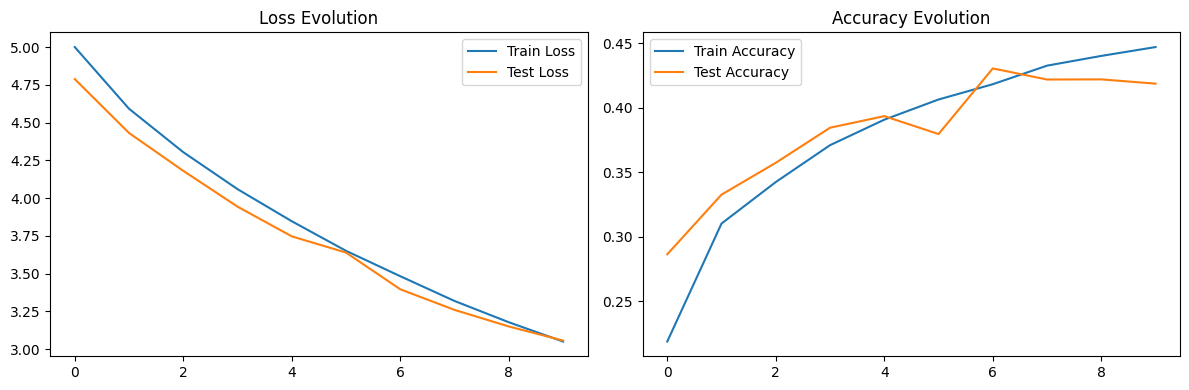

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the image data to [0, 1] range
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert class labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model architecture with different activation function and regularization
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='elu', input_shape=(32, 32, 3), kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='elu', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='elu', kernel_regularizer=l2(0.01)))
model.add(Dense(10, activation='softmax'))

# Compile the model with categorical crossentropy loss, SGD optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

# Train the model for 10 epochs with batch size of 256, using validation data
history = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Model accuracy on test data: {accuracy*100:.2f}%")

# Plot the loss and accuracy evolution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Loss Evolution')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Accuracy Evolution')
plt.tight_layout()
plt.show()


# 3. Trying Different Network Architectures: Increase or Decrease the Number of Layers, Sizes, etc. (Convolutional and Pooling, etc.)

Epoch 1/10
196/196 [==============================] - 59s 298ms/step - loss: 1.8739 - accuracy: 0.3173 - val_loss: 1.6022 - val_accuracy: 0.4184
Epoch 2/10
196/196 [==============================] - 60s 307ms/step - loss: 1.5540 - accuracy: 0.4451 - val_loss: 1.4114 - val_accuracy: 0.4945
Epoch 3/10
196/196 [==============================] - 57s 290ms/step - loss: 1.3841 - accuracy: 0.5119 - val_loss: 1.2580 - val_accuracy: 0.5513
Epoch 4/10
196/196 [==============================] - 57s 290ms/step - loss: 1.2685 - accuracy: 0.5534 - val_loss: 1.1926 - val_accuracy: 0.5814
Epoch 5/10
196/196 [==============================] - 60s 306ms/step - loss: 1.1876 - accuracy: 0.5856 - val_loss: 1.2340 - val_accuracy: 0.5578
Epoch 6/10
196/196 [==============================] - 61s 313ms/step - loss: 1.1218 - accuracy: 0.6092 - val_loss: 1.0580 - val_accuracy: 0.6242
Epoch 7/10
196/196 [==============================] - 59s 301ms/step - loss: 1.0630 - accuracy: 0.6300 - val_loss: 1.0271 - val_ac

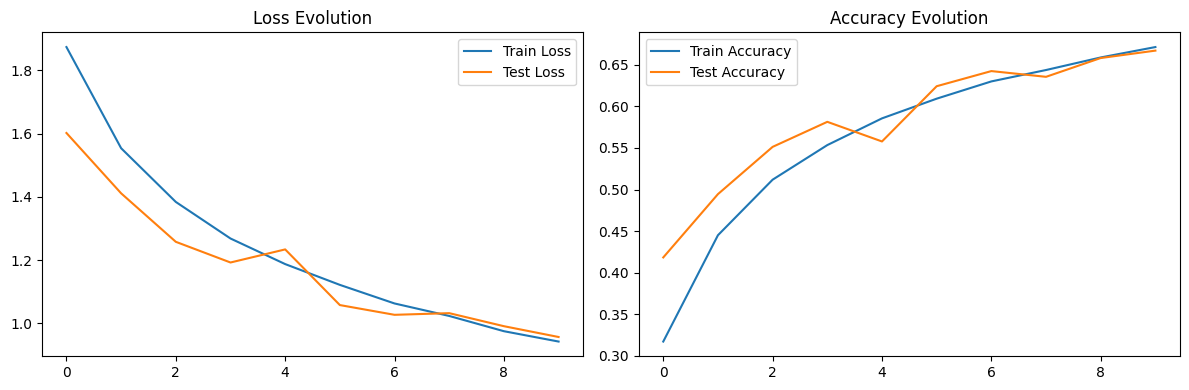

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the image data to [0, 1] range
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert class labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model architecture with different number of layers
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model with categorical crossentropy loss, RMSprop optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

# Train the model for 10 epochs with batch size of 256, using validation data
history = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Model accuracy on test data: {accuracy*100:.2f}%")

# Plot the loss and accuracy evolution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Loss Evolution')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Accuracy Evolution')
plt.tight_layout()
plt.show()


# 4. Analyze Results: Visualize Training and Loss Curves, Calculate Metrics, Analyze Results, Provide Recommendations for Possible Model Improvements



Epoch 1/10
196/196 [==============================] - 42s 210ms/step - loss: 1.9167 - accuracy: 0.2930 - val_loss: 1.5846 - val_accuracy: 0.4624
Epoch 2/10
196/196 [==============================] - 38s 195ms/step - loss: 1.6344 - accuracy: 0.4031 - val_loss: 1.4306 - val_accuracy: 0.5082
Epoch 3/10
196/196 [==============================] - 37s 188ms/step - loss: 1.5274 - accuracy: 0.4434 - val_loss: 1.3393 - val_accuracy: 0.5312
Epoch 4/10
196/196 [==============================] - 37s 188ms/step - loss: 1.4676 - accuracy: 0.4654 - val_loss: 1.3141 - val_accuracy: 0.5375
Epoch 5/10
196/196 [==============================] - 37s 189ms/step - loss: 1.4178 - accuracy: 0.4871 - val_loss: 1.2428 - val_accuracy: 0.5659
Epoch 6/10
196/196 [==============================] - 35s 181ms/step - loss: 1.3736 - accuracy: 0.5031 - val_loss: 1.2089 - val_accuracy: 0.5783
Epoch 7/10
196/196 [==============================] - 37s 191ms/step - loss: 1.3384 - accuracy: 0.5152 - val_loss: 1.1853 - val_ac

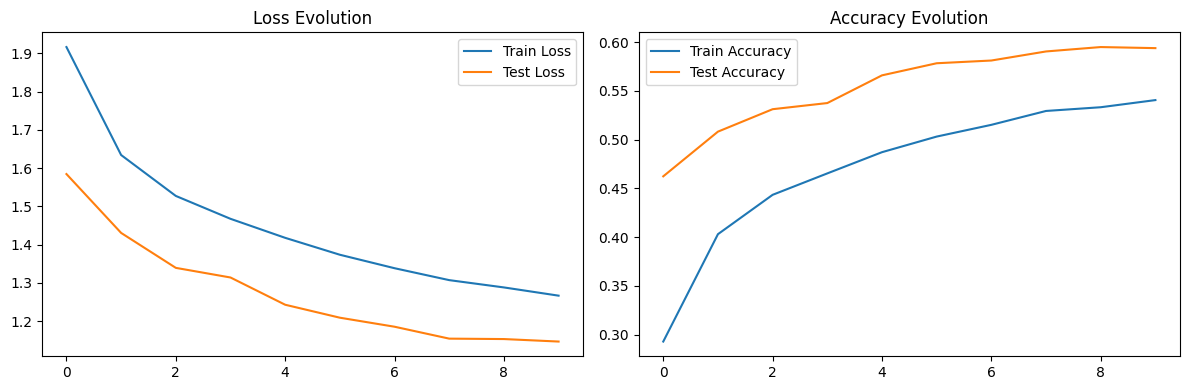

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the image data to [0, 1] range
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert class labels to one-hot encoded vectors
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define the CNN model architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model with categorical crossentropy loss, Adam optimizer, and accuracy metric
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train the model for 10 epochs with batch size of 256, using validation data
history = model.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test))

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Model accuracy on test data: {accuracy*100:.2f}%")

# Plot the loss and accuracy evolution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Loss Evolution')
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Accuracy Evolution')
plt.tight_layout()
plt.show()


# Conclusions



Examining the four codes for training convolutional neural networks (CNNs) on the CIFAR-10 dataset, we can conclude the following:

SGD and ELU with L2 Regularization:

SGD (Stochastic Gradient Descent) is a basic optimizer without adaptive learning rates.
ELU (Exponential Linear Unit) activation helps avoid the "dying ReLU" problem due to its non-linearity at negative values.
L2 regularization helps prevent overfitting by penalizing large weights.
RMSprop and ReLU with Dropout:

RMSprop is an adaptive optimizer that adjusts the learning rate for each parameter.
ReLU (Rectified Linear Unit) is a popular activation function that helps speed up training and avoids the vanishing gradient problem for positive values.
Dropout randomly drops neurons during training, reducing the risk of overfitting.
Adam and ReLU with Dropout:

Adam is an efficient adaptive optimizer combining the advantages of RMSprop and SGD with momentum.
Dropout is used as in the previous variant to prevent overfitting.
Adam and ReLU with Increased Dropout:

This code uses the same optimizer and activation function as variant #3 but increases the dropout rate to further prevent overfitting.
For CIFAR-10, it was necessary to adapt the input data shape to the size of CIFAR-10 images, which are 32x32 pixels in three color channels (32, 32, 3), and potentially adjust the network architecture to account for the complexity and diversity of CIFAR-10 data. In each of the variants, it was also necessary to verify the learning parameters to ensure the best possible results on the test dataset.